**1-DataSet**

In [1]:
!pip install --upgrade scikit-learn==1.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [2]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('punkt')
# Chargement du dataset
df= pd.read_json("/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json", lines=True)
#df=df.sample(60000)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Compter le nombre d'articles par catégorie
top_categories = df['category'].value_counts().head(5)
# Afficher les 5 catégories dominantes
print(top_categories)

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
Name: count, dtype: int64


In [4]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [5]:
# Liste des catégories à garder
categories_to_keep = ["POLITICS", "WELLNESS", "ENTERTAINMENT", "TRAVEL", "STYLE & BEAUTY"]
# Filtrer le DataFrame
df = df[df["category"].isin(categories_to_keep)]
# Vérification

In [6]:
import pandas as pd

# Exemple : ton DataFrame s'appelle df
df = df[~(df['headline'].isna() | (df['headline'].str.strip() == '') |
          df['short_description'].isna() | (df['short_description'].str.strip() == ''))]


In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
import pandas as pd

# Supposons que ton DataFrame s'appelle df
print("Taille du DataFrame (lignes, colonnes) :", df.shape)

# Afficher les colonnes (features)
print("Colonnes/features :", df.columns.tolist())

# Vérifier le type de données pour chaque colonne
print("\nTypes des colonnes :")
print(df.dtypes)

Taille du DataFrame (lignes, colonnes) : (84381, 6)
Colonnes/features : ['link', 'headline', 'category', 'short_description', 'authors', 'date']

Types des colonnes :
link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object


In [9]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffingtonpost.com/entry/anti-abor...,Cash-Strapped States Spend Millions Trying To ...,POLITICS,North Carolina had to pay $1 million out of it...,Laura Bassett,2016-08-26
1,https://www.huffingtonpost.com/entry/medicare-...,"Medicare Was Born 50 Years Ago, And It's Still...",POLITICS,Conservatives are still trying to undermine th...,Jonathan Cohn,2015-07-30
2,https://www.huffingtonpost.com/entry/will-smit...,"Will Smith's 'Fresh Prince' Rap Returns, Star ...",ENTERTAINMENT,"The audience at BBC's ""Graham Norton Show"" was...",,2013-05-25
3,https://www.huffingtonpost.com/entry/the-way-w...,The Way We Used To Travel: 12 Ways Travel Has ...,TRAVEL,5. You had to call your airline to check fligh...,,2014-02-22
4,https://www.huffingtonpost.com/entry/democrati...,The CEO Of The Democratic Convention Will Watc...,POLITICS,"""We'll have more diversity in one delegation t...",Laura Bassett,2016-06-23
...,...,...,...,...,...,...
84376,https://www.huffingtonpost.com/entry/41-photos...,41 Photos Of Presidential Pets Over Time,POLITICS,For animal lovers and history buffs alike.,Caroline Bologna,2018-03-30
84377,https://www.huffingtonpost.com/entry/syria-pol...,"20 Million Children In Syria, Surrounding Coun...",WELLNESS,"""We also know that adults tend to have much hi...","Reuters, Reuters",2013-11-08
84378,https://www.huffingtonpost.com/entry/celebrati...,Celebrating 'Eating Planet-Nutrition Today: A ...,WELLNESS,"Today, the Barilla Center for Food & Nutrition...","Danielle Nierenberg, Contributor\nPresident, F...",2012-06-29
84379,https://www.huffpost.com/entry/seth-meyers-hal...,"Seth Meyers Hits Ted Cruz, Marjorie Taylor Gre...",ENTERTAINMENT,"The ""Late Night"" team also suggested outfits f...",Lee Moran,2021-10-30


**2. Prétraitement**

In [10]:
# Suppression des colonnes inutiles
df.drop(['link', 'authors', 'date'], axis=1, inplace=True)
df

,headline,category,short_description
0,Cash-Strapped States Spend Millions Trying To ...,POLITICS,North Carolina had to pay $1 million out of it...
1,"Medicare Was Born 50 Years Ago, And It's Still...",POLITICS,Conservatives are still trying to undermine th...
2,"Will Smith's 'Fresh Prince' Rap Returns, Star ...",ENTERTAINMENT,"The audience at BBC's ""Graham Norton Show"" was..."
3,The Way We Used To Travel: 12 Ways Travel Has ...,TRAVEL,5. You had to call your airline to check fligh...
4,The CEO Of The Democratic Convention Will Watc...,POLITICS,"""We'll have more diversity in one delegation t..."
...,...,...,...
84376,41 Photos Of Presidential Pets Over Time,POLITICS,For animal lovers and history buffs alike.
84377,"20 Million Children In Syria, Surrounding Coun...",WELLNESS,"""We also know that adults tend to have much hi..."
84378,Celebrating 'Eating Planet-Nutrition Today: A ...,WELLNESS,"Today, the Barilla Center for Food & Nutrition..."
84379,"Seth Meyers Hits Ted Cruz, Marjorie Taylor Gre...",ENTERTAINMENT,"The ""Late Night"" team also suggested outfits f..."


In [11]:
# Fusion des colonnes 'short_description' et 'headline'
df['text'] = df['headline'] + ' ' + df['short_description']
df.drop(['headline', 'short_description'], axis=1, inplace=True)
df

,category,text
0,POLITICS,Cash-Strapped States Spend Millions Trying To ...
1,POLITICS,"Medicare Was Born 50 Years Ago, And It's Still..."
2,ENTERTAINMENT,"Will Smith's 'Fresh Prince' Rap Returns, Star ..."
3,TRAVEL,The Way We Used To Travel: 12 Ways Travel Has ...
4,POLITICS,The CEO Of The Democratic Convention Will Watc...
...,...,...
84376,POLITICS,41 Photos Of Presidential Pets Over Time For a...
84377,WELLNESS,"20 Million Children In Syria, Surrounding Coun..."
84378,WELLNESS,Celebrating 'Eating Planet-Nutrition Today: A ...
84379,ENTERTAINMENT,"Seth Meyers Hits Ted Cruz, Marjorie Taylor Gre..."


In [12]:
# Conversion en minuscules
df['text'] = df['text'].str.lower()
df

,category,text
0,POLITICS,cash-strapped states spend millions trying to ...
1,POLITICS,"medicare was born 50 years ago, and it's still..."
2,ENTERTAINMENT,"will smith's 'fresh prince' rap returns, star ..."
3,TRAVEL,the way we used to travel: 12 ways travel has ...
4,POLITICS,the ceo of the democratic convention will watc...
...,...,...
84376,POLITICS,41 photos of presidential pets over time for a...
84377,WELLNESS,"20 million children in syria, surrounding coun..."
84378,WELLNESS,celebrating 'eating planet-nutrition today: a ...
84379,ENTERTAINMENT,"seth meyers hits ted cruz, marjorie taylor gre..."


In [13]:
#Suppression de la ponctuation, des chiffres et des symboles spéciaux
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df

,category,text
0,POLITICS,cash strapped states spend millions trying to ...
1,POLITICS,medicare was born years ago and it s still...
2,ENTERTAINMENT,will smith s fresh prince rap returns star ...
3,TRAVEL,the way we used to travel ways travel has ...
4,POLITICS,the ceo of the democratic convention will watc...
...,...,...
84376,POLITICS,photos of presidential pets over time for a...
84377,WELLNESS,million children in syria surrounding coun...
84378,WELLNESS,celebrating eating planet nutrition today a ...
84379,ENTERTAINMENT,seth meyers hits ted cruz marjorie taylor gre...


In [14]:
# Suppression des stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,category,text
0,POLITICS,cash strapped states spend millions trying def...
1,POLITICS,medicare born years ago still attack conservat...
2,ENTERTAINMENT,smith fresh prince rap returns star joined alf...
3,TRAVEL,way used travel ways travel changed digital ag...
4,POLITICS,ceo democratic convention watch gop get good l...
...,...,...
84376,POLITICS,photos presidential pets time animal lovers hi...
84377,WELLNESS,million children syria surrounding countries r...
84378,WELLNESS,celebrating eating planet nutrition today chal...
84379,ENTERTAINMENT,seth meyers hits ted cruz marjorie taylor gree...


In [15]:
# Lemmatisation
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df

,category,text
0,POLITICS,cash strapped state spend million trying defen...
1,POLITICS,medicare born year ago still attack conservati...
2,ENTERTAINMENT,smith fresh prince rap return star joined alfo...
3,TRAVEL,way used travel way travel changed digital age...
4,POLITICS,ceo democratic convention watch gop get good l...
...,...,...
84376,POLITICS,photo presidential pet time animal lover histo...
84377,WELLNESS,million child syria surrounding country receiv...
84378,WELLNESS,celebrating eating planet nutrition today chal...
84379,ENTERTAINMENT,seth meyers hit ted cruz marjorie taylor green...


**3. Représentation**

#### a.Tf-IDF

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Suppose ton DataFrame s'appelle df
# et contient les colonnes 'text' et 'category'

# Encoder la colonne category (5 classes)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(df[['category']])
# Vérification
print("Shape de y :", y.shape)
print("Classes :", encoder.categories_)


Shape de y : (84381, 5)
Classes : [array(['ENTERTAINMENT', 'POLITICS', 'STYLE & BEAUTY', 'TRAVEL',
       'WELLNESS'], dtype=object)]


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df["text"])
print("Shape de X :", X.shape)

Shape de X : (84381, 5000)


In [18]:
print (X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
results_TFIDF=[]

**Regression logistic**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)


,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [22]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_TFIDF.append({
        "model": "LogisticRegression",
        "accuracy": acc,
        "report": report
    })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**SVM (LinearSVC)**

In [23]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

model_SVC = OneVsRestClassifier(LinearSVC(max_iter=5000))
model_SVC.fit(X_train, y_train)

y_pred = model_SVC.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_TFIDF.append({
        "model": "LinearSVC",
        "accuracy": acc,
        "report": report
    })


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


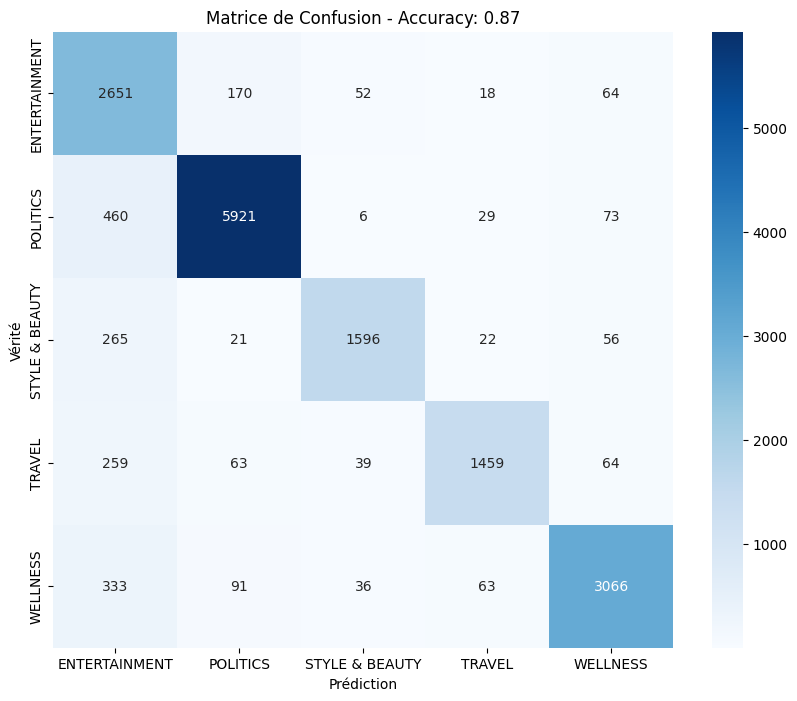

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Si y_test et y_pred sont one-hot
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Labels
labels = encoder.categories_[0]

# Matrice de confusion
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title(f'Matrice de Confusion - Accuracy: {accuracy_score(y_test_class, y_pred_class):.2f}')
plt.show()


**KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remplacement de SVM par KNN
knn = KNeighborsClassifier(n_neighbors=5)  # tu peux ajuster n_neighbors selon ton cas
model = OneVsRestClassifier(knn)

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_TFIDF.append({
        "model": "KNN",
        "accuracy": acc,
        "report": report
    })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**RandomForest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_TFIDF.append({
        "model": "RandomForest",
        "accuracy": acc,
        "report": report
    })


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**B.Doc2Vec**

In [27]:
results_Doc2Vec=[]

In [28]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# 1. Préparer les documents
documents = [TaggedDocument(words=word_tokenize(text.lower()), tags=[i]) 
             for i, text in enumerate(df["text"])]

# 2. Entraîner le modèle Doc2Vec
model_d2v = Doc2Vec(
    vector_size=100,   # taille du vecteur
    window=5,
    min_count=2,
    workers=4,
    epochs=20,
    dm=1  # distributed memory (meilleure pour les textes)
)
model_d2v.build_vocab(documents)
model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

# 3. Extraire les vecteurs
X = [model_d2v.infer_vector(word_tokenize(text.lower())) for text in df["text"]]
import numpy as np
X = np.array(X)

print("Shape de X :", X.shape)


Shape de X : (84381, 100)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [31]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_Doc2Vec.append({
        "model": "LogisticRegression",
        "accuracy": acc,
        "report": report
    })


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**SVC(linear)**

In [32]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LinearSVC(max_iter=5000))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_Doc2Vec.append({
        "model": "LinearSVC",
        "accuracy": acc,
        "report": report
    })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**KNN**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remplacement de SVM par KNN
knn = KNeighborsClassifier(n_neighbors=5)  # tu peux ajuster n_neighbors selon ton cas
model = OneVsRestClassifier(knn)

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_Doc2Vec.append({
        "model": "KNN",
        "accuracy": acc,
        "report": report
    })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**RandomForest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None


In [35]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.categories_[0], output_dict=True)
results_Doc2Vec.append({
        "model": "RandomForest",
        "accuracy": acc,
        "report": report
    })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**RNN**

**Evaluation**

  Vectorizer               Model  Accuracy  Macro F1  Weighted F1
1     TF-IDF           LinearSVC  0.843930  0.875816     0.889140
0     TF-IDF  LogisticRegression  0.813711  0.854403     0.873190
3     TF-IDF        RandomForest  0.791965  0.812825     0.836956
2     TF-IDF                 KNN  0.728091  0.759864     0.788696
4    Doc2Vec  LogisticRegression  0.519879  0.625097     0.651288
5    Doc2Vec           LinearSVC  0.509984  0.610575     0.640236
6    Doc2Vec                 KNN  0.377792  0.316910     0.381359
7    Doc2Vec        RandomForest  0.238550  0.254781     0.340296


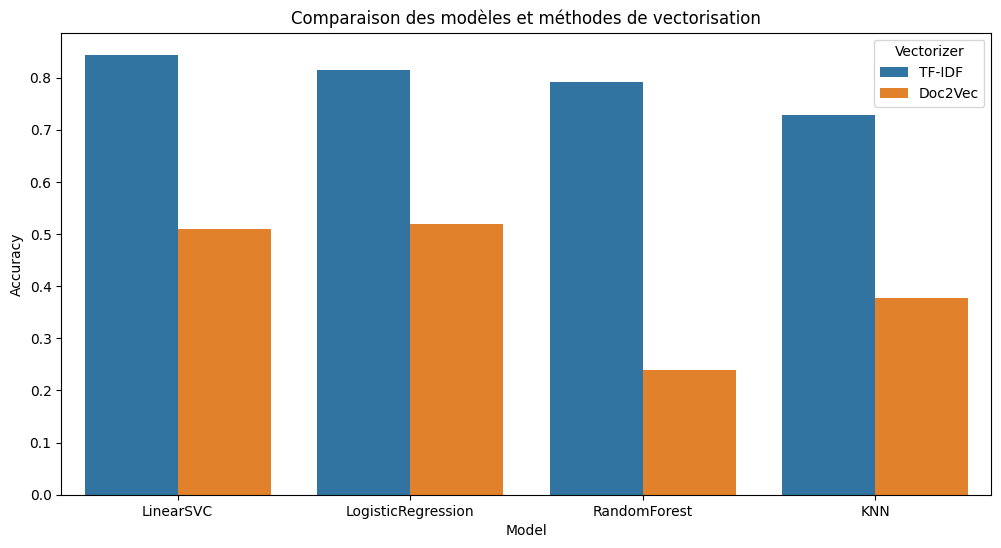

In [36]:
import pandas as pd

# Supposons que tu as déjà tes listes de résultats
# results_TFIDF et results_Doc2Vec
# Chaque élément est un dictionnaire avec : 
# {"model": ..., "accuracy": ..., "report": {...}}

# Fonction pour extraire les métriques principales
def extract_metrics(results, vectorizer_name):
    data = []
    for r in results:
        model_name = r['model']
        acc = r['accuracy']
        # Macro F1-score
        macro_f1 = r['report']['macro avg']['f1-score']
        # Weighted F1-score
        weighted_f1 = r['report']['weighted avg']['f1-score']
        data.append({
            "Vectorizer": vectorizer_name,
            "Model": model_name,
            "Accuracy": acc,
            "Macro F1": macro_f1,
            "Weighted F1": weighted_f1
        })
    return data

# Extraire les métriques
tfidf_metrics = extract_metrics(results_TFIDF, "TF-IDF")
doc2vec_metrics = extract_metrics(results_Doc2Vec, "Doc2Vec")

# Combiner les deux
all_metrics = tfidf_metrics + doc2vec_metrics

# Créer un DataFrame
df_comparison = pd.DataFrame(all_metrics)

# Trier par Accuracy décroissante
df_comparison = df_comparison.sort_values(by=["Accuracy"], ascending=False)

# Afficher
print(df_comparison)

# Optionnel : afficher joli tableau pour présentation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_comparison, x="Model", y="Accuracy", hue="Vectorizer")
plt.title("Comparaison des modèles et méthodes de vectorisation")
plt.ylabel("Accuracy")
plt.show()


In [37]:
df_comparison

,Vectorizer,Model,Accuracy,Macro F1,Weighted F1
1,TF-IDF,LinearSVC,0.843930,0.875816,0.889140
0,TF-IDF,LogisticRegression,0.813711,0.854403,0.873190
3,TF-IDF,RandomForest,0.791965,0.812825,0.836956
2,TF-IDF,KNN,0.728091,0.759864,0.788696
4,Doc2Vec,LogisticRegression,0.519879,0.625097,0.651288
5,Doc2Vec,LinearSVC,0.509984,0.610575,0.640236
6,Doc2Vec,KNN,0.377792,0.316910,0.381359
7,Doc2Vec,RandomForest,0.238550,0.254781,0.340296


**Application**

In [38]:
import pickle

# Sauvegarder le modèle
with open("model_SVC.pkl", "wb") as f:
    pickle.dump(model, f)

# Charger plus tard
#with open("model.pkl", "rb") as f:
   # model = pickle.load(f)


In [39]:
import joblib

# Exemple : ton vectorizer déjà entraîné
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# vectorizer.fit(df["text"])

# Sauvegarde
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [40]:
import joblib

# 🔹 1️⃣ Charger le vectorizer et le modèle
vectorizer = joblib.load("/kaggle/working/tfidf_vectorizer.pkl")
clf = joblib.load("/kaggle/working/model.pkl")

# 🔹 2️⃣ Exemple de texte à tester
new_texts = [
    "The government announced new economic reforms.",
    "Top 10 tips for wellness and healthy living.",
    "The latest blockbuster movie breaks box office records."
]

# 🔹 3️⃣ Transformer le texte avec le TF-IDF
X_new = vectorizer.transform(new_texts)
# 🔹 4️⃣ Prédire avec le modèle
pred = clf.predict(X_new)
pred_class = encoder.inverse_transform(pred)
print("Catégorie prédite :", pred_class[0])



# 🔹 5️⃣ Afficher les résultats
for text, label in zip(new_texts, pred):
    print(f"Texte : {text}")
    print(f"Classe prédite : {label}")
    print("-" * 50)



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/model.pkl'